# RNN을 사용한 문장 생성
## 언어 모델을 사용한 문장 생성
문장 생성 구현

In [1]:
import numpy as np
from common.functions import softmax
import nbimporter
from ch06 import BetterRnnlm
from ch06 import Rnnlm

In [2]:
class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
            
        return word_ids

In [3]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 가중치 없는 경우
model = RnnlmGen()

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you rod hand-held earthquake clue expenditures flying serve scaring though licensing replies merrill thousands bans mutual-fund admits parallel proud church rising swing fastest-growing awarded intended shifted emergency unrest tci disorders campaign fe embarrassing addressing camp since chile voted gangs mountain accident eased released noon awful walker aside retire watches senior arizona clothes phoenix connolly bets flamboyant wanting copy mayor record lee engage centered involves commuters upheld supplying unprofitable studios bicycle welch worldwide surely switch tougher presentation reading dollar-denominated should surprises press organic developers weak traditional desperately atmosphere shrank surprising movements gulf gathering native bottom return coupons faith staging confessed freeway


In [4]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 직접 학습한 가중치 불러오기
model = RnnlmGen()
model.load_params('Rnnlm.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you realistic milwaukee deep circulation kohlberg nearly implement constituency weekend districts mural mainly breakfast scientists thousand touting wear irony diego shah permissible closing dave jamaica changed importing been swell depreciation magic terminals shipyard millions payment after-tax lowe dam oakes trends ddb 19th requested deprived blame assuming deviation pitched caltrans goodyear historical hub seng fractionally hahn poised raiders terms states crest benefit debentures petrochemicals corruption burmah joins prohibited members deb stadiums o. nominal engaged puerto maria luxury-car silent pollution saudi ford fuels unfriendly hardly offenders connecticut hell properly beaten reinvest ignoring train spin practice swiftly exact contributing pope social freed mrs.


In [5]:
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

## 교재 가중치 불러오기
model = RnnlmGen()
model.load_params('Rnnlm_origin.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you recruit actors nominal shanghai endless ranks australian killed prepaid essential tanks racked middle-class wines neatly corps shoot grey adams intel instituted discouraging mary conceded increasingly chunk liquidation coordinate forecasting spacecraft harmony autos alternatives majority manager hasbro restoring trade contributing robert irish cocom sailing branch gatt compensate curb researcher gin trials supplier obligations imbalances apparel abortions wood reaches kangyo chains romantic engelken itt oct. roller-coaster billing expire neighborhoods explore morale reports data detrex hurdle behalf representation businessman ruling siemens engaging gubernatorial a comparison lure distributor detroit suspend margins enthusiasts fully backing ranges dover tapped outlawed influx cs superconductors equitable jewelers


더 좋은 문장으로

In [7]:
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]

        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x).flatten()
            p = softmax(score).flatten()

            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

    def get_state(self):
        states = []
        for layer in self.lstm_layers:
            states.append((layer.h, layer.c))
        return states

    def set_state(self, states):
        for layer, state in zip(self.lstm_layers, states):
            layer.set_state(*state)

In [ ]:
import sys
sys.path.append('..')
from common.np import *
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('./BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

## seq2seq

덧셈 데이터셋

In [56]:
from dataset import sequence

(x_train, t_train), (x_test, t_test) = sequence.load_data('./addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
print()

print(x_train[0])
print(t_train[0])
print()

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]

71+118 
_189 


## seq2seq 구현
Encoder 클래스

In [16]:
from common.time_layers import *

class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(4*H)).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
    
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

Decoder 클래스

In [17]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = (rn(4*H)).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
    
    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size): ## decoder의 학습과 생성이 다른 이유? 학습은 probabilistic vs 생성은 deterministic
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out) 

            ## score -> (1, 1, V)
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
        
        return sampled
            

Seq2seq 클래스

In [18]:
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

seq2seq 평가

In [19]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.60
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.34
| 에폭 1 |  반복 41 / 351 | 시간 4[s] | 손실 2.06
| 에폭 1 |  반복 61 / 351 | 시간 5[s] | 손실 1.94
| 에폭 1 |  반복 81 / 351 | 시간 6[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 7[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 8[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 9[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 10[s] | 손실 1.82
| 에폭 1 |  반복 181 / 351 | 시간 11[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 15[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 20[s] | 손실 1.73
Q 77+85  
T 162 
☒ 1001
---
Q 975+164
T 1139
☒ 1022
---
Q 582+84 
T 666 
☒ 1002
---
Q 8+155  
T 163 
☒ 102 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1022
---
Q 761+292
T 1053
☒ 1022
---
Q 830+597
T 1427
☒ 1022
--

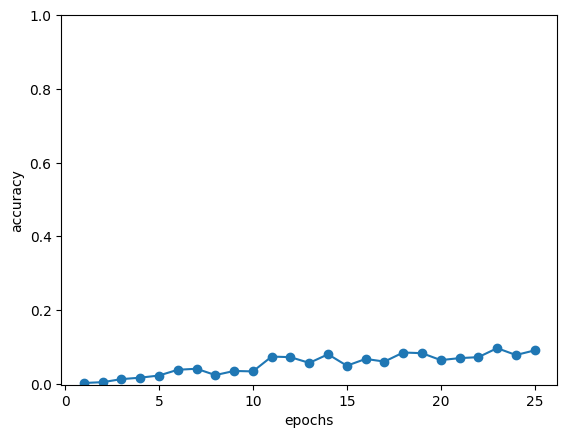

In [26]:
plt.plot(np.arange(1,max_epoch+1), acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()

## seq2seq 개선

입력 데이터 반전(Reverse)

In [28]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

reversed_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    reversed_acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.60
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.34
| 에폭 1 |  반복 41 / 351 | 시간 3[s] | 손실 2.06
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 1.94
| 에폭 1 |  반복 81 / 351 | 시간 6[s] | 손실 1.90
| 에폭 1 |  반복 101 / 351 | 시간 8[s] | 손실 1.86
| 에폭 1 |  반복 121 / 351 | 시간 11[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 12[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 13[s] | 손실 1.84
| 에폭 1 |  반복 181 / 351 | 시간 15[s] | 손실 1.84
| 에폭 1 |  반복 201 / 351 | 시간 18[s] | 손실 1.83
| 에폭 1 |  반복 221 / 351 | 시간 19[s] | 손실 1.83
| 에폭 1 |  반복 241 / 351 | 시간 21[s] | 손실 1.81
| 에폭 1 |  반복 261 / 351 | 시간 22[s] | 손실 1.77
| 에폭 1 |  반복 281 / 351 | 시간 23[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 24[s] | 손실 1.73
| 에폭 1 |  반복 321 / 351 | 시간 25[s] | 손실 1.72
| 에폭 1 |  반복 341 / 351 | 시간 27[s] | 손실 1.70
Q   58+77
T 162 
☒ 102 
---
Q 461+579
T 1139
☒ 1022
---
Q  48+285
T 666 
☒ 502 
---
Q   551+8
T 163 
☒ 102 
---
Q  55+763
T 422 
☒ 502 
---
Q 752+006
T 857 
☒ 1002
---
Q 292+167
T 1053
☒ 1022
---
Q 795+038
T 1427
☒ 1024


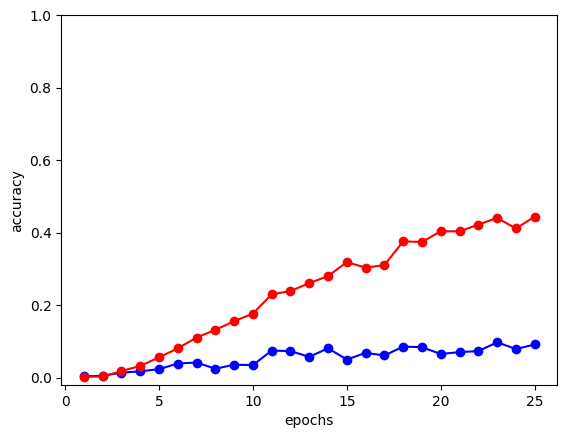

In [32]:
plt.plot(np.arange(1,max_epoch+1), acc_list, marker='o', color='blue')
plt.plot(np.arange(1,max_epoch+1), reversed_acc_list, marker='o', color='red')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.show()